<h2 align="center">Image Compression with K-means Clustering</h2>

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from sklearn.cluster import MiniBatchKMeans

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

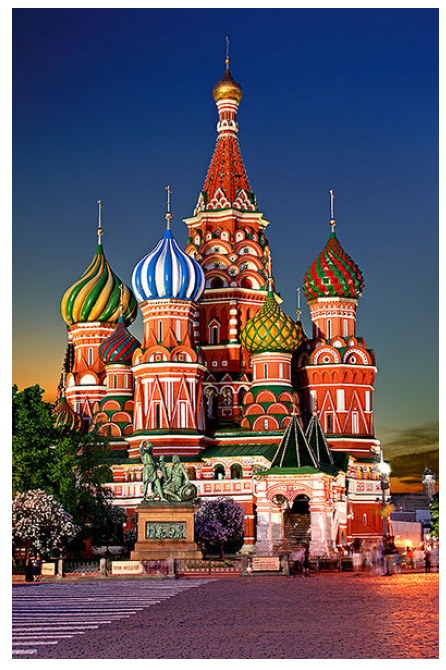

In [3]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [4]:
img.shape

(600, 394, 3)

In [5]:
img_data = (img / 255.0).reshape(600 * 394, 3) # .reshape(-1, 3)
img_data.shape

(236400, 3)

In [6]:
img_dir = 'images/'

In [7]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()
    import matplotlib
    matplotlib.image.imsave('Compressed.jpg', k_img)

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…